稀疏化参数 epsilon = 0.01
通过调整使得最终保留 $90\%$ 的边

每个 mu 值有$50$个 SAMPLE

RAW_SCORE 这个文件中 对于每个mu值（可以看作第零个坐标）

第一个坐标是样本编号

第二个坐标是方法 ['Euclidean NMI', 'Spherical NMI', 'Euclidean ECS', 'Spherical ECS']

RAW_QF 这个文件中，对于每个mu值

其坐标是样本编号

In [26]:
#隐藏警告
import warnings
warnings.filterwarnings('ignore')

graph_type = "ppm" # "ppm" or "lfr"
percent = 0.6
embedding_method = "lap" # "lap" or "n2v"

In [27]:
if graph_type == "ppm":
    row_length = 6
    step_total  = 18
elif graph_type == "lfr":
    row_length = 5
    step_total  = 10


import pickle
import numpy as np


start_step = 0.05
step_size = 0.05
#graph_type = "lfr"
end_steps = {"lfr": 0.5, "ppm": 0.9}
end_step = end_steps[graph_type]
MU = np.around(np.arange(start_step, end_step + 0.01, step_size), decimals=2)

raw_score = {}

delete_types = ["original", "sparse", "random"]

for delete_type in delete_types:
    raw_score[delete_type] = np.zeros((50,step_total, 2))
    if delete_type=='original':
        input_dir = f"results_{delete_type}"
    else:    
       input_dir = f"results_{delete_type}_{percent}"
    input_dir = "leiden_" + input_dir
    for mu in MU:
        mu_str = f"{mu:.2f}"
        #从文件加载 RAW_SCORE
        with open(f'{input_dir}/{graph_type}_{delete_type}_{embedding_method}_raw_score_mu{mu_str}.pkl', 'rb') as file:
            raw_score[delete_type][:,int(mu / step_size + 0.001) - 1,:] = pickle.load(file)
            #print(f"RAW_SCORE 已成功从文件中加载")

stat = {}
for delete_type in delete_types:
    stat[delete_type] = np.zeros((step_total, 2))

for delete_type in delete_types:
    for mu in MU: 
        stat[delete_type] = np.mean(raw_score[delete_type], axis=0)

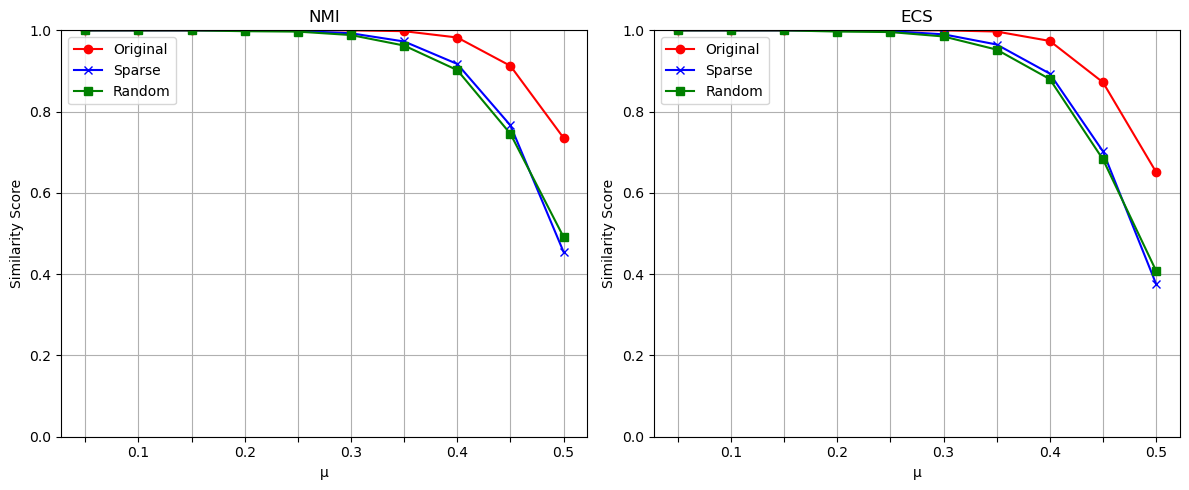

In [28]:
import numpy as np
import matplotlib.pyplot as plt


methods = [0, 1]
titles = ['NMI', 'ECS']

# 创建 2x2 网格布局
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# 绘制每个 method 的折线图
for i, method in enumerate(methods):
    ax = axs[i % 2]
    ax.plot(stat['original'][:, method], label='Original', color='r', marker='o')  # 红色曲线
    ax.plot(stat['sparse'][:, method], label='Sparse', color='b', marker='x')  # 蓝色曲线
    ax.plot(stat['random'][:, method], label='Random', color='g', marker='s')  # 绿色曲线
    
    # 添加网格
    ax.grid(True)
    
    # 添加图例并设置位置
    ax.legend(loc='best')
    
    # 添加标签和标题
    x_labels = np.arange(0.05, (step_total+1)*step_size, 0.05)
    ax.set_xticks(np.arange(len(x_labels)))
    xticklabels = ["" if i % 2 == 1 else i/20 for i in range(1, step_total+1)]
    ax.set_xticklabels(xticklabels)
    ax.set_xlabel('μ')
    ax.set_ylabel('Similarity Score')
    ax.set_title(titles[i])
    # 设置 y 轴范围
    ax.set_ylim(0, 1)  # 这里设置 y 轴的范围为 0 到 1，可以根据实际数据调整

# 调整子图之间的间距
plt.tight_layout()

plt.savefig(f'Z_{graph_type}_{embedding_method}_{percent}.png', bbox_inches='tight')

# 显示图形
plt.show()